In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
BASE_DIR=os.path.dirname(os.getcwd())
import pandas as pd
import sys
sys.path.append(BASE_DIR)

from vae.utils.modelIO import save_model, load_model, load_metadata
from notebooks.utils import PlotParams

In [2]:
plotter = PlotParams()
plotter.set_params()
FIG_DIR = os.path.join(os.pardir, 'figs')
RES_DIR = os.path.join(os.pardir, 'results')

## MNIST

In [3]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names = ['mnist_dgjs-'+str(a) for a in alphas]
alphas += ['kl', 'kl_reverse']
model_names += ['mnist_kl', 'mnist_kl_reverse']
n = len(model_names)

train_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='train_eval.log')
    for a, model_name in zip(alphas, model_names)}
test_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names)}

train_loss = np.zeros(n)
test_loss = np.zeros(n)
train_recon = np.zeros(n)
test_recon = np.zeros(n)
for i, a in enumerate(alphas):
    train_loss[i] = train_dict[a]['loss']
    test_loss[i] = test_dict[a]['loss']
    train_recon[i] = train_dict[a]['recon_loss']
    test_recon[i] = test_dict[a]['recon_loss']
print(test_recon)

[12.20042777  7.60351425  7.33939193  7.38186755  7.56025205  7.77138907
  7.90265422  8.25052241  8.55362972  8.45965115 11.60945839]


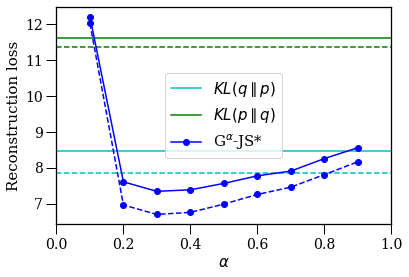

In [4]:
plt.plot([0, 1], [train_recon[-2], train_recon[-2]], 'c--')
plt.plot([0, 1], [test_recon[-2], test_recon[-2]], 'c', label=r'$KL(q\parallel p)$')
plt.plot([0, 1], [train_recon[-1], train_recon[-1]], 'g--')
plt.plot([0, 1], [test_recon[-1], test_recon[-1]], 'g', label=r'$KL(p\parallel q)$')
plt.plot(alphas[:-2], train_recon[:-2], 'bo--')
plt.plot(alphas[:-2], test_recon[:-2], 'bo-', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_reconstruction_losses.pdf'), bbox_inches='tight')

In [5]:
train_kl1 = np.zeros(n-2)
train_kl2 = np.zeros(n-2)
test_kl1 = np.zeros(n-2)
test_kl2 = np.zeros(n-2)
for i, a in enumerate(alphas[:-2]):
    train_kl1[i] = train_dict[a]['kl_loss1']
    train_kl2[i] = train_dict[a]['kl_loss2']
    test_kl1[i] = test_dict[a]['kl_loss1']
    test_kl2[i] = test_dict[a]['kl_loss2']

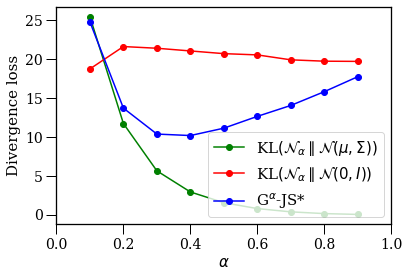

In [6]:
plt.plot(alphas[:-2], test_kl1, 'go-', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(\mu,\Sigma))$')
plt.plot(alphas[:-2], test_kl2, 'ro-', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(0,I))$')
plt.plot(alphas[:-2], test_loss[:-2]-test_recon[:-2], 'bo-', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Divergence loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_divergence_losses.pdf'), bbox_inches='tight')

## Fashion MNIST

In [7]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names = ['fashion_dgjs-'+str(a) for a in alphas]
alphas += ['kl', 'kl_reverse']
model_names += ['fashion_kl', 'fashion_kl_reverse']

train_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='train_eval.log')
    for a, model_name in zip(alphas, model_names)}
test_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names)}

train_loss = np.zeros(n)
test_loss = np.zeros(n)
train_recon = np.zeros(n)
test_recon = np.zeros(n)
for i, a in enumerate(alphas):
    train_loss[i] = train_dict[a]['loss']
    test_loss[i] = test_dict[a]['loss']
    train_recon[i] = train_dict[a]['recon_loss']
    test_recon[i] = test_dict[a]['recon_loss']
print(test_recon)

[13.51650215 10.90041007 10.50762135  9.57969522  9.79995579 10.00586571
 10.33732805 10.84065288 11.40229772 11.98076643 14.42116407]


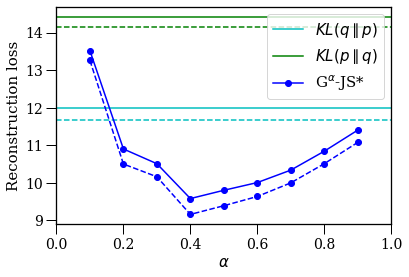

In [8]:
plt.plot([0, 1], [train_recon[-2], train_recon[-2]], 'c--')
plt.plot([0, 1], [test_recon[-2], test_recon[-2]], 'c', label=r'$KL(q\parallel p)$')
plt.plot([0, 1], [train_recon[-1], train_recon[-1]], 'g--')
plt.plot([0, 1], [test_recon[-1], test_recon[-1]], 'g', label=r'$KL(p\parallel q)$')
plt.plot(alphas[:-2], train_recon[:-2], 'bo--')
plt.plot(alphas[:-2], test_recon[:-2], 'bo-', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_reconstruction_losses_fashion.pdf'), bbox_inches='tight')

In [9]:
train_kl1 = np.zeros(n-2)
train_kl2 = np.zeros(n-2)
test_kl1 = np.zeros(n-2)
test_kl2 = np.zeros(n-2)
for i, a in enumerate(alphas[:-2]):
    train_kl1[i] = train_dict[a]['kl_loss1']
    train_kl2[i] = train_dict[a]['kl_loss2']
    test_kl1[i] = test_dict[a]['kl_loss1']
    test_kl2[i] = test_dict[a]['kl_loss2']

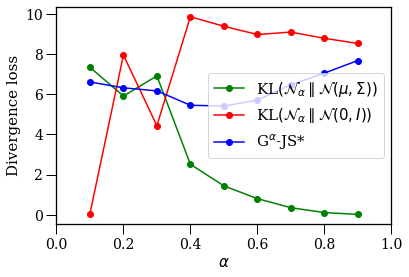

In [10]:
plt.plot(alphas[:-2], test_kl1, 'go-', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(\mu,\Sigma))$')
plt.plot(alphas[:-2], test_kl2, 'ro-', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(0,I))$')
plt.plot(alphas[:-2], test_loss[:-2]-test_recon[:-2], 'bo-', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Divergence loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'gjs_divergence_losses_fashion.pdf'), bbox_inches='tight')

## dSprites

In [11]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names = ['dsprites_dgjs-'+str(a) for a in alphas]
alphas += ['kl', 'kl_reverse']
model_names += ['dsprites_kl', 'dsprites_kl_reverse']

train_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='train_eval.log')
    for a, model_name in zip(alphas, model_names)}
test_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names)}

train_loss = np.zeros(n)
test_loss = np.zeros(n)
train_recon = np.zeros(n)
test_recon = np.zeros(n)
for i, a in enumerate(alphas):
    train_loss[i] = train_dict[a]['loss']
    test_loss[i] = test_dict[a]['loss']
    train_recon[i] = train_dict[a]['recon_loss']
    test_recon[i] = test_dict[a]['recon_loss']
print(test_recon)

[ 5.54287848  5.17646864  5.0643766   5.16621488  4.96817257  5.29914599
  5.25757423  5.42065456  5.74259863 13.55126369 14.1816003 ]


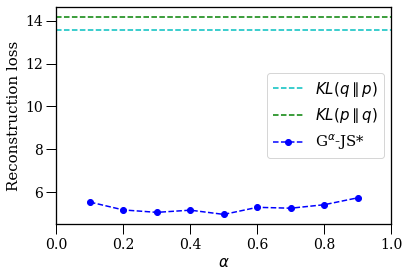

In [12]:
plt.plot([0, 1], [train_recon[-2], train_recon[-2]], 'c--', label=r'$KL(q\parallel p)$')
plt.plot([0, 1], [train_recon[-1], train_recon[-1]], 'g--', label=r'$KL(p\parallel q)$')
plt.plot(alphas[:-2], test_recon[:-2], 'bo--', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_reconstruction_losses_dsprites.pdf'), bbox_inches='tight')

In [13]:
train_kl1 = np.zeros(n-2)
train_kl2 = np.zeros(n-2)
test_kl1 = np.zeros(n-2)
test_kl2 = np.zeros(n-2)
for i, a in enumerate(alphas[:-2]):
    train_kl1[i] = train_dict[a]['kl_loss1']
    train_kl2[i] = train_dict[a]['kl_loss2']
    test_kl1[i] = test_dict[a]['kl_loss1']
    test_kl2[i] = test_dict[a]['kl_loss2']

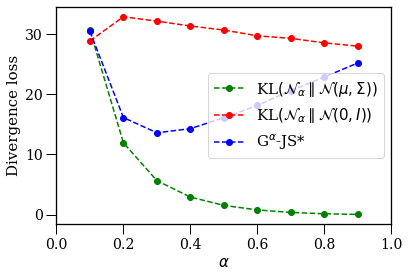

In [14]:
plt.plot(alphas[:-2], test_kl1, 'go--', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(\mu,\Sigma))$')
plt.plot(alphas[:-2], test_kl2, 'ro--', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(0,I))$')
plt.plot(alphas[:-2], test_loss[:-2]-test_recon[:-2], 'bo--', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Divergence loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_divergence_losses_dsprites.pdf'), bbox_inches='tight')

## Chairs

In [15]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model_names = ['chairs_dgjs-'+str(a) for a in alphas]
alphas += ['kl', 'kl_reverse']
model_names += ['chairs_kl', 'chairs_kl_reverse']

train_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='train_eval.log')
    for a, model_name in zip(alphas, model_names)}
test_dict = {
    a: load_metadata(
        directory=os.path.join(RES_DIR, model_name), filename='test_eval.log')
    for a, model_name in zip(alphas, model_names)}

train_loss = np.zeros(n)
test_loss = np.zeros(n)
train_recon = np.zeros(n)
test_recon = np.zeros(n)
for i, a in enumerate(alphas):
    train_loss[i] = train_dict[a]['loss']
    test_loss[i] = test_dict[a]['loss']
    train_recon[i] = train_dict[a]['recon_loss']
    test_recon[i] = test_dict[a]['recon_loss']
print(test_recon)

[15.53092778 13.05554953 12.09468236 11.64382038 11.75121969 12.0662865
 12.52502143 13.10981206 13.52395768 12.26560092 19.87596354]


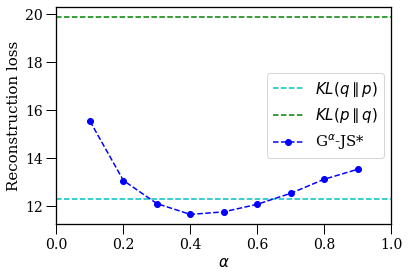

In [16]:
plt.plot([0, 1], [test_recon[-2], test_recon[-2]], 'c--', label=r'$KL(q\parallel p)$')
plt.plot([0, 1], [test_recon[-1], test_recon[-1]], 'g--', label=r'$KL(p\parallel q)$')
plt.plot(alphas[:-2], test_recon[:-2], 'bo--', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Reconstruction loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_reconstruction_losses_chairs.pdf'), bbox_inches='tight')

In [17]:
train_kl1 = np.zeros(n-2)
train_kl2 = np.zeros(n-2)
test_kl1 = np.zeros(n-2)
test_kl2 = np.zeros(n-2)
for i, a in enumerate(alphas[:-2]):
    train_kl1[i] = train_dict[a]['kl_loss1']
    train_kl2[i] = train_dict[a]['kl_loss2']
    test_kl1[i] = test_dict[a]['kl_loss1']
    test_kl2[i] = test_dict[a]['kl_loss2']

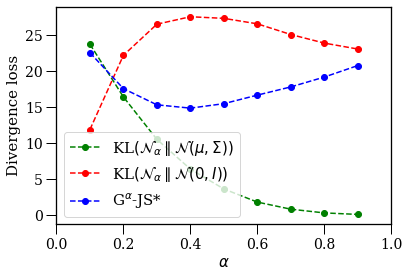

In [18]:
plt.plot(alphas[:-2], test_kl1, 'go--', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(\mu,\Sigma))$')
plt.plot(alphas[:-2], test_kl2, 'ro--', label=r'KL$(\mathcal{N}_{\alpha}\parallel\mathcal{N}(0,I))$')
plt.plot(alphas[:-2], test_loss[:-2]-test_recon[:-2], 'bo--', label=r'G$^{\alpha}$-JS*')
plt.xlim(0, 1), plt.xlabel(r'$\alpha$'), plt.ylabel('Divergence loss'), plt.legend()
plt.savefig(os.path.join(FIG_DIR, 'dgjs_divergence_losses_chairs.pdf'), bbox_inches='tight')